# World Happiness Report

The global happiness survey was carried out in order gain insights on the state of happiness globally. A full report showing the surveys for five years and the data used in building this predictive model of the happiness score can be found on [Kaggle](https://www.kaggle.com/unsdsn/world-happiness).

## Importing the necessary libraries and datasets 

In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
whr_2015 = pd.read_csv('2015.csv')
whr_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
whr_2016 = pd.read_csv('2016.csv')
whr_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
whr_2017 = pd.read_csv('2017.csv')
whr_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
whr_2018 = pd.read_csv('2018.csv')
whr_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
whr_2019 = pd.read_csv('2019.csv')
whr_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
years = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019]

for year in years:
    print (year.shape)
    print (year.columns)

(158, 12)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
(157, 13)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
(155, 12)
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
(156, 9)
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support',

## Data Cleaning

In [9]:
# drop irrelevant columns

whr_2015.drop(columns=['Region', 'Standard Error', 'Dystopia Residual'], inplace=True)
whr_2016.drop(columns=['Region','Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], inplace=True)
whr_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], inplace=True)


In [10]:
# renaming some columns

whr_2015 = whr_2015.rename(columns={'Happiness Rank': 'Overall Rank', 'Economy (GDP per Capita)': 'GDP per capita', 
                                    'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expentancy', 
                                    'Trust (Government Corruption)': 'Perceptions of corruption'})

whr_2016 = whr_2016.rename(columns={'Happiness Rank': 'Overall Rank', 'Economy (GDP per Capita)': 'GDP per capita', 
                                    'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expentancy', 
                                    'Trust (Government Corruption)': 'Perceptions of corruption'})

whr_2017 = whr_2017.rename(columns={'Happiness.Rank': 'Overall Rank', 'Happiness.Score': 'Happiness Score', 
                                    'Economy..GDP.per.Capita.': 'GDP per capita', 'Family': 'Social support', 
                                    'Health..Life.Expectancy.': 'Healthy life expentancy', 
                                    'Trust..Government.Corruption.': 'Perceptions of corruption'})

whr_2018 = whr_2018.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score', 
                                    'Freedom to make life choices': 'Freedom'})

whr_2019 = whr_2019.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score', 
                                    'Freedom to make life choices': 'Freedom'})

In [11]:
# reorder the columns

columns_titles = ['Country', 'Overall Rank', 'Happiness Score', 'GDP per capita', 'Social support', 
                  'Healthy life expentancy', 'Freedom', 'Perceptions of corruption', 'Generosity']

whr_2017 = whr_2017.reindex(columns=columns_titles)
whr_2018 = whr_2017.reindex(columns=columns_titles)
whr_2019 = whr_2017.reindex(columns=columns_titles)

## Merging the datasets

In [12]:
# before merging, we have to add a new column 'Year' to each of the dataframes in order to show the year of report collation

whr_2015['Year'] = 2015
whr_2016['Year'] = 2016
whr_2017['Year'] = 2017
whr_2018['Year'] = 2018
whr_2019['Year'] = 2019

In [13]:
whr_all = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019]

full_whr = pd.concat(whr_all)
print (full_whr)

                      Country  Overall Rank  Happiness Score  GDP per capita  \
0                 Switzerland             1            7.587        1.396510   
1                     Iceland             2            7.561        1.302320   
2                     Denmark             3            7.527        1.325480   
3                      Norway             4            7.522        1.459000   
4                      Canada             5            7.427        1.326290   
..                        ...           ...              ...             ...   
150                    Rwanda           151            3.471        0.368746   
151                     Syria           152            3.462        0.777153   
152                  Tanzania           153            3.349        0.511136   
153                   Burundi           154            2.905        0.091623   
154  Central African Republic           155            2.693        0.000000   

     Social support  Healthy life expen

## EDA

In [14]:
full_whr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    780 non-null    object 
 1   Overall Rank               780 non-null    int64  
 2   Happiness Score            780 non-null    float64
 3   GDP per capita             780 non-null    float64
 4   Social support             780 non-null    float64
 5   Healthy life expentancy    780 non-null    float64
 6   Freedom                    780 non-null    float64
 7   Perceptions of corruption  780 non-null    float64
 8   Generosity                 780 non-null    float64
 9   Year                       780 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.0+ KB


In [15]:
full_whr.describe()

,Overall Rank,Happiness Score,GDP per capita,Social support,Healthy life expentancy,Freedom,Perceptions of corruption,Generosity,Year
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,78.500000,5.364087,0.950439,1.069258,0.568591,0.405196,0.130152,0.244086,2016.989744
std,45.070035,1.133287,0.418049,0.321299,0.239046,0.150049,0.107604,0.132685,1.416897
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,39.750000,4.507750,0.632370,0.871030,0.397523,0.300638,0.059033,0.153075,2016.000000
50%,78.500000,5.279000,1.009850,1.123853,0.618150,0.427140,0.093147,0.228260,2017.000000
75%,117.250000,6.168000,1.286012,1.297623,0.754444,0.517385,0.164184,0.319931,2018.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,2019.000000


In [16]:
full_whr['Year'].value_counts()

2015    158
2016    157
2019    155
2018    155
2017    155
Name: Year, dtype: int64

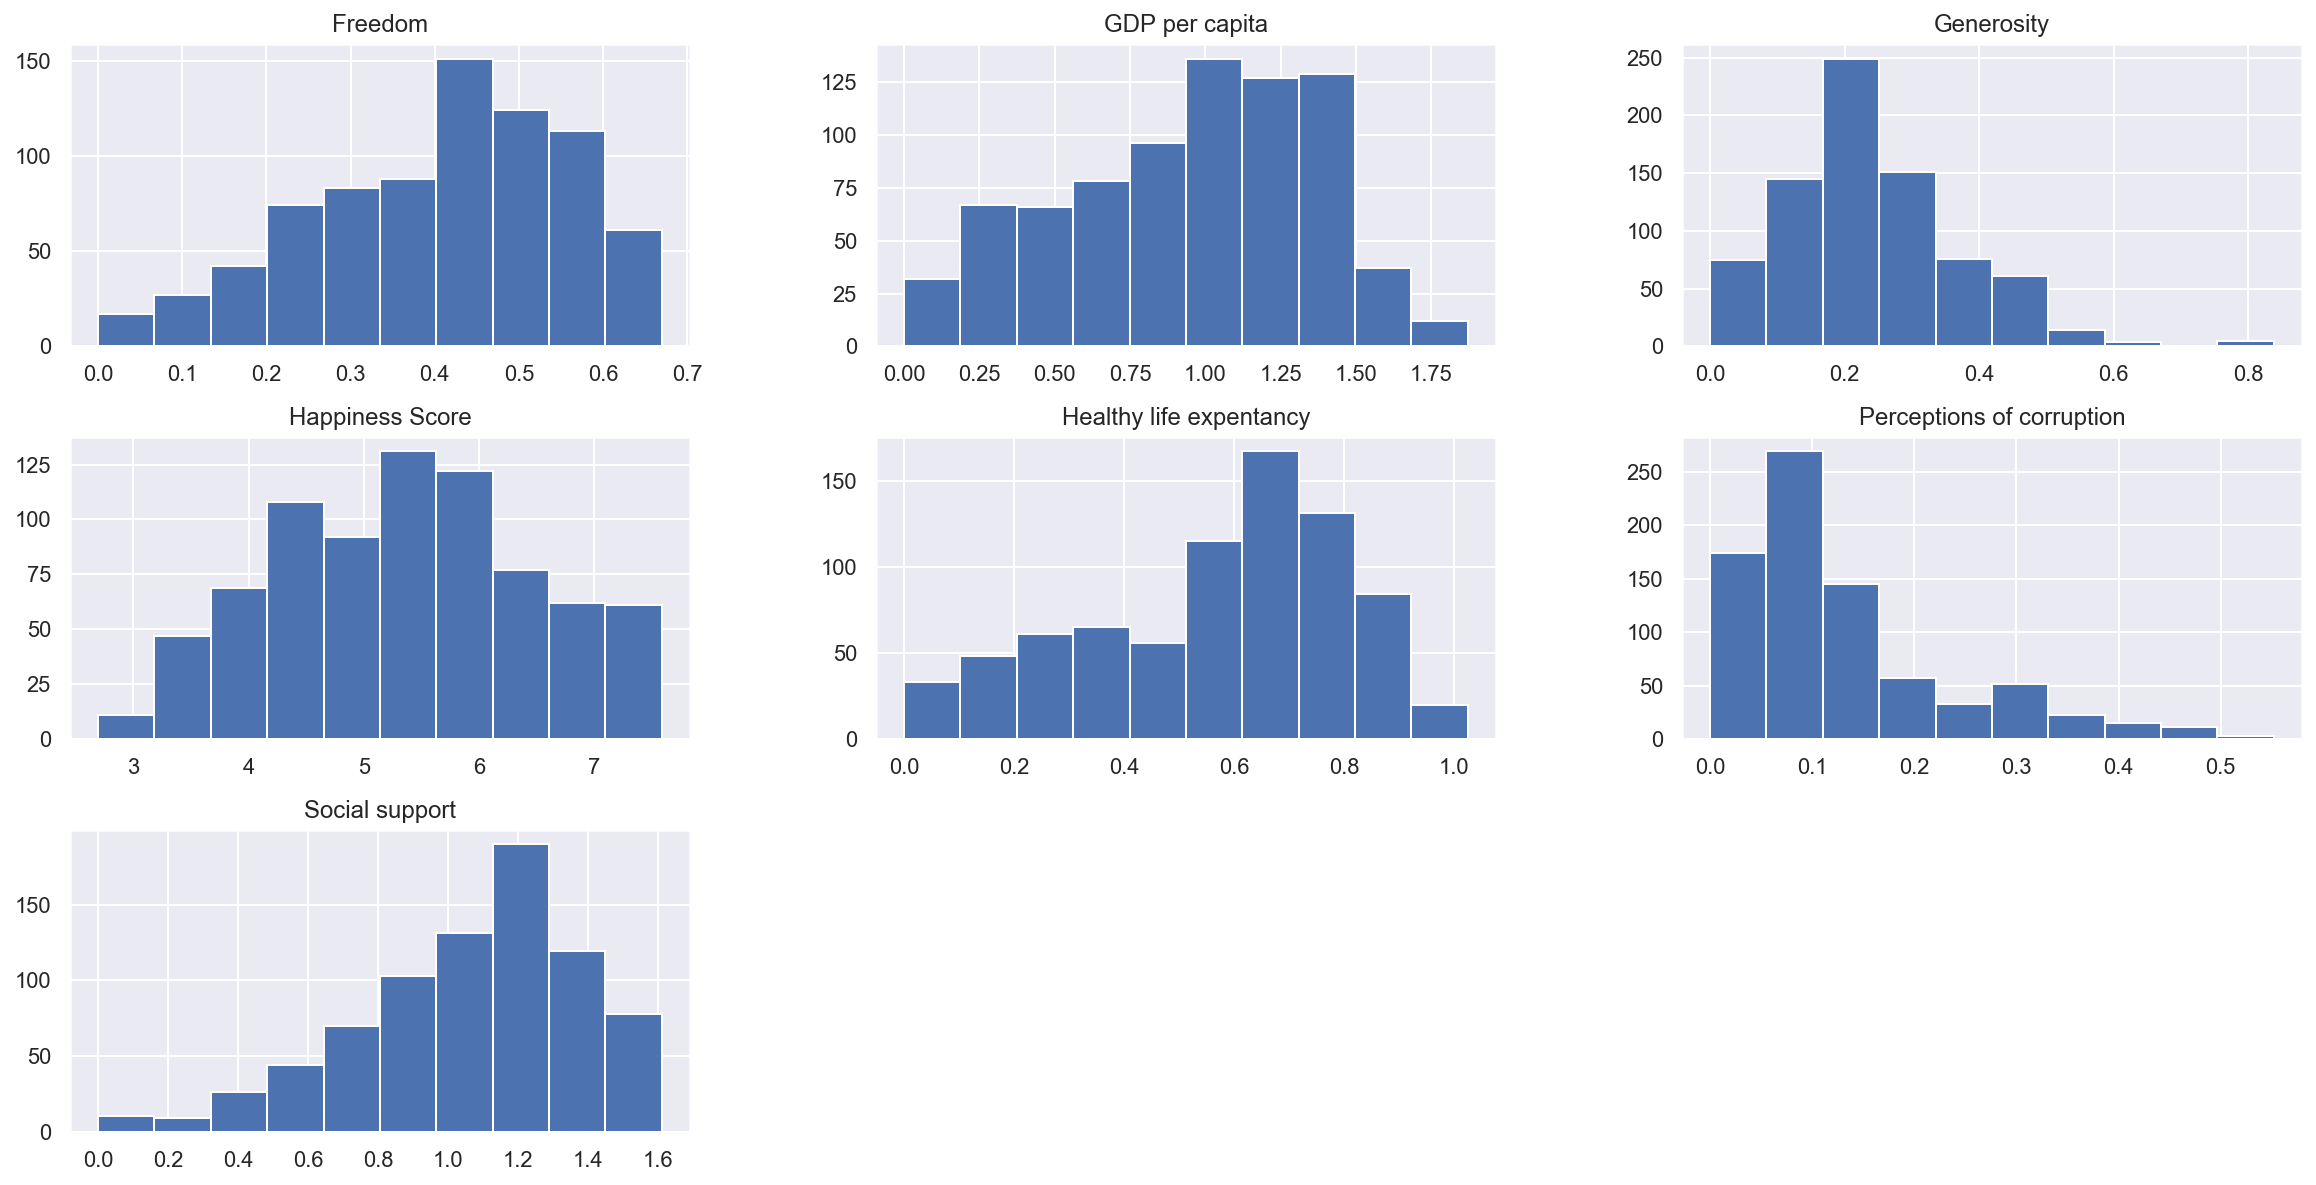

In [22]:
# Histograms

feature = ['Happiness Score', 'GDP per capita', 'Social support', 'Healthy life expentancy', 
            'Freedom', 'Perceptions of corruption', 'Generosity']
full_whr[feature].hist(figsize=(20, 10));

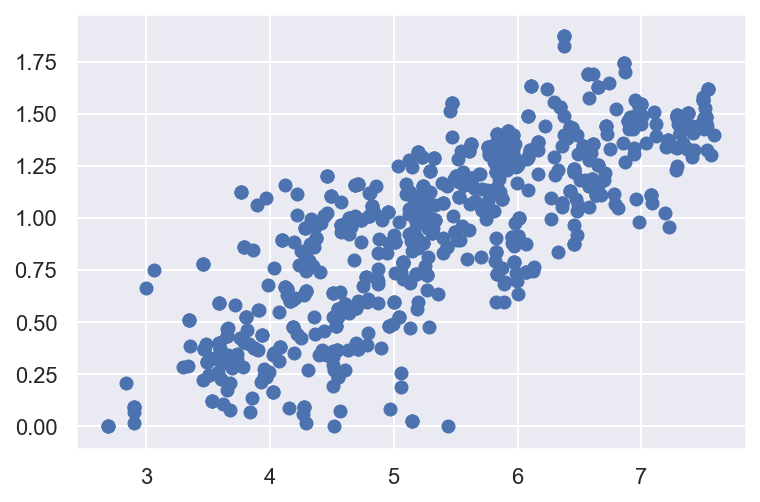

In [23]:
plt.scatter(full_whr['Happiness Score'], full_whr['GDP per capita']);

The scatterplot above shows a direct relationship between the happiness score and GDP per capital of an economy. This means that a higher GDP leads to a higher happiness score.

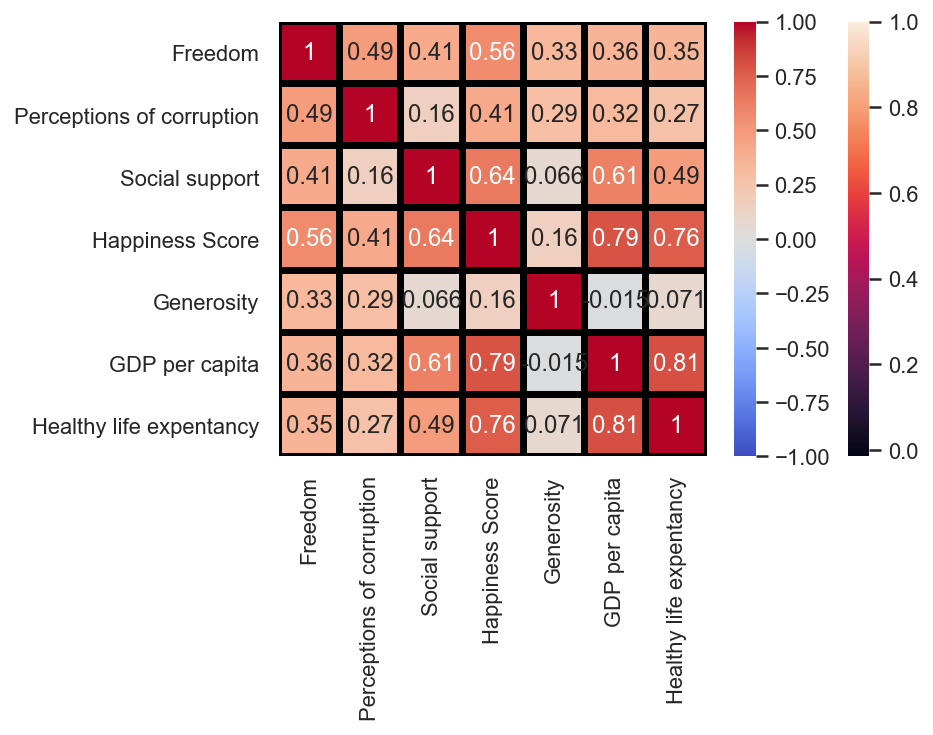

In [25]:
#Heatmap

# Drop non-numerical variables
numerical = list(set(full_whr.columns) - 
                 set(['Country', 'Overall Rank', 'Year']))

# Calculate and plot
corr_matrix = full_whr[numerical].corr()
sns.heatmap(corr_matrix)
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, center = 0, 
            cmap = 'coolwarm', linewidths = 3, linecolor = 'black');

## Building The Model

In [26]:
# drop the categorical features

full_whr.drop(['Country', 'Overall Rank', 'Year'], 1, inplace=True)

In [27]:
# the low correlated features were removed

X = np.array(full_whr.drop(['Happiness Score', 'Generosity', 'Perceptions of corruption'], 1))
X = preprocessing.scale(X)
y = np.array(full_whr['Happiness Score'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
hsm = LinearRegression(n_jobs=-1)
hsm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [30]:
y_pred = hsm.predict(X_test)

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred

,Actual,Predicted
0,5.324,5.606093
1,7.006,6.794723
2,5.921,6.383797
3,7.119,6.592976
4,4.962,4.983019
...,...,...
151,5.878,5.739660
152,7.494,7.065637
153,4.081,4.449256
154,6.578,5.873804


In [31]:
print (hsm.score(X_train, y_train))
print (hsm.score(X_test, y_test))

0.7671920498180742
0.7650574680386519


## Model Evaluation

In [32]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

print ('Root Mean Squared Error: ', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error:  0.5399421525801253
